In [10]:
import time
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
import os
import logging
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
## Setup chrome options
chrome_options = Options()
chrome_options.add_argument("--headless") # Ensure GUI is off
chrome_options.add_argument("--no-sandbox")

# Silent download of drivers
logging.getLogger('WDM').setLevel(logging.NOTSET)
os.environ['WDM_LOG'] = 'False'

# Create service
webdriver_service = Service(ChromeDriverManager().install())

# Create driver
driver = webdriver.Chrome(service = webdriver_service, options = chrome_options)

# Go to the characters in books page
page_url = "https://thehungergames.fandom.com/wiki/Category:Characters"
driver.get(page_url)

# Click on Accept cookies
time.sleep(3)
driver.find_element(By.XPATH, '//div[text()="ACEITAR"]').click()

# Find books
book_categories = driver.find_elements(by=By.CLASS_NAME, value='category-page__member-link')

books = []
for category in book_categories:
    book_url = category.get_attribute('href')
    book_name = category.text
    books.append({'book_name': book_name, "url": book_url})

In [32]:
books

[{'book_name': 'Category:Catching Fire characters',
  'url': 'https://thehungergames.fandom.com/wiki/Category:Catching_Fire_characters'},
 {'book_name': 'Category:Deceased characters',
  'url': 'https://thehungergames.fandom.com/wiki/Category:Deceased_characters'},
 {'book_name': 'Category:Disabled characters',
  'url': 'https://thehungergames.fandom.com/wiki/Category:Disabled_characters'},
 {'book_name': 'Category:District Heroes',
  'url': 'https://thehungergames.fandom.com/wiki/Category:District_Heroes'},
 {'book_name': 'Category:Groups',
  'url': 'https://thehungergames.fandom.com/wiki/Category:Groups'},
 {'book_name': 'Category:Individuals by gender',
  'url': 'https://thehungergames.fandom.com/wiki/Category:Individuals_by_gender'},
 {'book_name': 'Category:Individuals by occupation',
  'url': 'https://thehungergames.fandom.com/wiki/Category:Individuals_by_occupation'},
 {'book_name': 'Category:Individuals by residency',
  'url': 'https://thehungergames.fandom.com/wiki/Category:In

In [33]:
select_list = ['Category:The Hunger Games characters', 'Category:Catching Fire characters', 'Category:Mockingjay characters']

selected_dicts = []
for d in books:
    if d['book_name'] in select_list:
        selected_dicts.append(d)

books = selected_dicts
books

[{'book_name': 'Category:Catching Fire characters',
  'url': 'https://thehungergames.fandom.com/wiki/Category:Catching_Fire_characters'},
 {'book_name': 'Category:Mockingjay characters',
  'url': 'https://thehungergames.fandom.com/wiki/Category:Mockingjay_characters'},
 {'book_name': 'Category:The Hunger Games characters',
  'url': 'https://thehungergames.fandom.com/wiki/Category:The_Hunger_Games_characters'}]

In [34]:
character_list = []

for book in books:
    # go to book page
    driver.get(book['url'])
    
    character_elems = driver.find_elements(by=By.CLASS_NAME, value = 'category-page__member-link')
    
    for elem in character_elems:
        character_list.append({'book': book['book_name'],'character': elem.text})

In [35]:
pd.DataFrame(character_list)

,book,character
0,Category:Catching Fire characters,Haymitch Abernathy
1,Category:Catching Fire characters,Atala
2,Category:Catching Fire characters,Beetee Latier
3,Category:Catching Fire characters,Blight
4,Category:Catching Fire characters,Bonnie
...,...,...
171,Category:The Hunger Games characters,Category:Tributes in the 74th Hunger Games
172,Category:The Hunger Games characters,Effie Trinket
173,Category:The Hunger Games characters,Madge Undersee
174,Category:The Hunger Games characters,Mayor Undersee


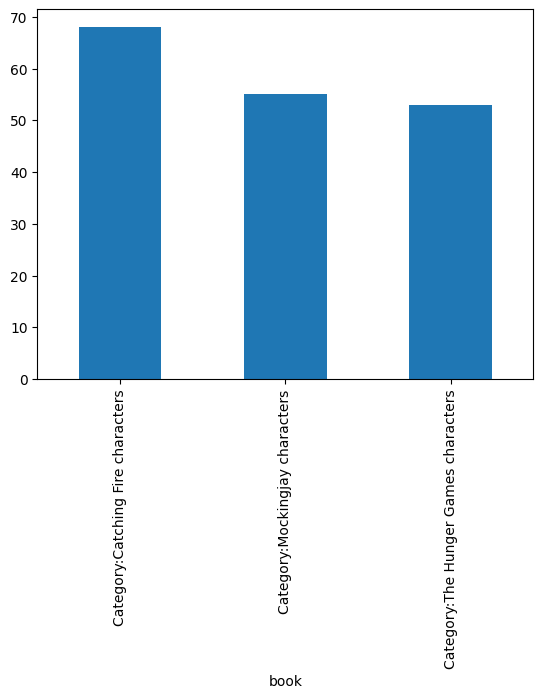

In [36]:
character_df = pd.DataFrame(character_list)
#df.to_csv('folder/subfolder/out.csv')  
character_df.to_csv('characters.csv', index=False)

character_df['book'].value_counts().plot(kind="bar")
plt.show()